### `Task` Train a KNN model on glass type dataset and find best n_neighnours.

Data Link: https://drive.google.com/file/d/17cbDNBmys04MJqQfrma3jd72VPMnxIq0/view?usp=share_link

In [48]:
# Your code goes here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv("glass.csv")

In [50]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [51]:
df["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [52]:
X=df.iloc[:,:-1]

In [53]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [54]:
y=df.iloc[:,-1]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
X_train

array([[-0.84623746, -0.74467528,  0.52636164, ..., -0.68807645,
        -0.33761134, -0.60110996],
       [ 0.28077633,  0.33413832,  0.54088841, ..., -0.03692037,
        -0.04564469,  1.78472688],
       [-0.0992632 ,  0.43938842, -2.03034913, ...,  1.44941417,
        -0.33761134, -0.60110996],
       ...,
       [-0.85278986, -0.34998738,  0.44646443, ..., -0.39080954,
        -0.33761134,  1.28767753],
       [ 0.0121277 ,  0.92617017, -0.43966828, ...,  0.26742432,
        -0.33761134, -0.60110996],
       [-0.09271079, -1.00780055, -0.02565546, ...,  0.33820216,
        -0.33761134,  1.3870874 ]])

In [58]:
scores=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

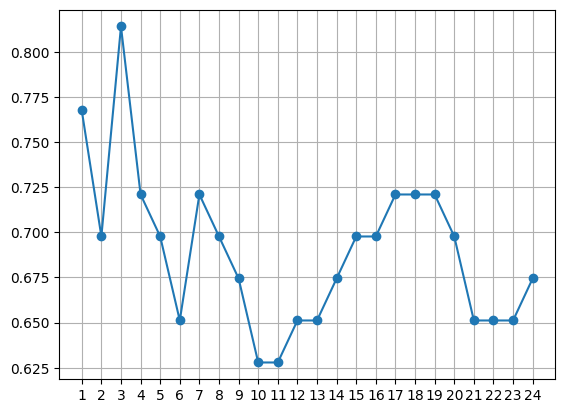

In [59]:
plt.plot(range(1,25),scores,marker="o")
plt.xticks(range(1, 25)) 
plt.grid(True)

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid={"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,50,100]}

In [70]:
clf=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=10,scoring="accuracy")

In [71]:
clf.fit(X,y)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 20, 25, 30, 50, 100]},
             scoring='accuracy')

In [72]:
clf.best_params_

{'n_neighbors': 3}